# The Colour Language Game

# Abstract
Both datasets, namely the x11 data and the colournaming.org data underwent the same preliminary stages. First, they were both opened in pandas data frames. Following this, they were cleaned by: being made all lowercase; having all white spaces and punctuation stripped; and finally, having all duplicates removed. Next, they were both converted into dictionaries in which the keys are the colour terms and the values are lists containing three elements, these being the correspond RGB values. The RGB values for the colournaming.org dictionary were formed by taking the average inputs for each present colour term from the default list. This is how the collective inteligence which constituted Bob's answers were produced. The euclidean distances between each present colour term in both dictionaries was then calculated using a list comprehension and stored in the variable 'distances'. Finally, a performance report was created which includes visualisations of the results as well as the time required to perform the calculation. These showed that Bob's answers were on the whole accurate.

# Keywords
'white', 'black', 'red', 'yellow', 'green', 'blue', 'brown', 'purple', 'orange', 'pink', 'lorem', 'ipsum'

# Introduction
The purpose of this exercise is to create an artifical player refered to as Bob who when presented with a colour term provides a shade that is supposed to be representative of said colour term. The RGB values of Bob's shade are then compared to uniform RGB values of the colour terms also provided by the program to assess Bob's degree of accuracy. The uniform RGB values are derived from the x11 dataset while Bob's answers are created from taking the average RGB values from all occurances of the present colour terms in the colournaming.org dataset. The latter dataset was the product of an online experiment in which thousands of user's colour terms to various colour shades equating to various RGB values. As such, Bob can be said to have collective intelligence.

# Methodology
* For this exercise, cleaning the data was crucial to calculating an average that was truly representative of the various user inputs. For example, some users wrote the colour terms with caps ('RED') or with adjacent spaces ('red '). For such answers to be included it was necessary to clean the data thoroughly. 

* To calculate the distances as quickly as possible all the RGB values were stored in dictionaries and the calculation was performed in one line of code using a list comprehension.  

* Automated testing was employed to check the result of the distances. One calculation of the average of all the distances came to 92. Since, however, the distances and their subseqent average may vary based on whether only the exact colour terms were included in Bob's collated answer ('red') or whether similar terms ('reds') ('darkred') were factored in, I decided to allow for a quarter of a standard deviation of my results either way from 92.    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from PIL import Image
import statistics
import math
import time
import string

Below the default list of colour terms is defined and assigned to the variable 'colour_terms'.

In [2]:
colour_terms = ['white', 'black', 'red', 'yellow', 'green', 'blue', 'brown', 'purple', 'orange', 'pink', 'lorem', 'ipsum']

In the following two cells the data sets are preprocessed. First, the colournaming.org set then the x11 dataset which is immediately converted to the dictionary 'x11_dic'.

In [3]:
df = pd.read_csv('/Users/isaaclambert/colour_naming_data.csv')
df['colour_name'] = df['colour_name'].str.lower() #makes series all lowercase
df['colour_name'] = df['colour_name'].str.replace(" ", "") #removes white spaces from series

def remove_punctuation(text):
    '''
    strips punctuation from dataframe series 
    '''
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['_colour_name'] = df['colour_name'].apply(remove_punctuation) #creates unpunctuated column
df = df.drop(['colour_name'], axis=1) #deletes punctuated column
df = df.drop_duplicates() #drops all duplicate rows                                              

In [4]:
x11df = pd.read_csv('/Users/isaaclambert/Desktop/rgb_x11.csv')
x11df['Unnamed: 3'] = x11df['Unnamed: 3'].str.lower() #makes series lower case
x11df['Unnamed: 3'] = x11df['Unnamed: 3'].str.replace(" ", "") #removes white spaces from series
x11df['colour_terms'] = x11df['Unnamed: 3'].apply(remove_punctuation) #creates unpunctuated column
x11df = x11df.drop(['Unnamed: 3'], axis=1) #deletes punctated column
x11df = x11df.rename(columns={"! $XConsortium: rgb.txt,v 10.41 94/02/20 18:39:36 rws Exp $": "r", "Unnamed: 1": "g", "Unnamed: 2": "b"})
x11df = x11df.drop_duplicates() #removes duplicate rows

early_dic = x11df.to_dict('index') #tranforms the dataframe into a dictionary 
x11_dic = {j["colour_terms"]:[j["r"], j["g"], j["b"]] for j in early_dic.values()} 
#forms a better formatted dictionary from the initial one

Here a function is build to ascertain which terms from the default list are contained in the two data sets. It returns two types of list which are used later.

In [5]:
def term_checker(dataframe):
    '''
    checks for keywords, returns terms list and yes/no list
    '''
    lst_of_terms = []
    yes_no_lst = []
    for i in colour_terms:
        if i in dataframe.values:
            lst_of_terms.append(i)
            yes_no_lst.append('yes')
        else:
            yes_no_lst.append('no')
    return lst_of_terms, yes_no_lst

cnd_redacted, cnd_yes_no = term_checker(df)
x11_redacted, x11_yes_no = term_checker(x11df)

The following function works out the average for all of the inputs for each present colour term in the colournaming.org dataset and returns the result as the dictionary 'cnd_dic'.

In [6]:
def avg_calc(lst=cnd_redacted):
    '''
    works out average and converts to dictionary 
    '''
    dic ={}
    for i in lst:
        df2 = df.loc[df['_colour_name'] == i]
        r_avg = df2.iloc[:, 1].sum(axis=0) / len(df2.index)
        g_avg = df2.iloc[:, 2].sum(axis=0) / len(df2.index) 
        b_avg = df2.iloc[:, 3].sum(axis=0) / len(df2.index)
        dic.update({i: [r_avg, g_avg, b_avg]})
    return dic
cnd_dic = avg_calc()

'distance_calc' works out the distances between the points for each colour term. The time taken for it to do this is recorded and printed in the performance report below.

In [7]:
def distance_calc(dic1=cnd_dic, dic2=x11_dic, terms=cnd_redacted):
    '''
    works out euclidian distances between 3 dimensional points
    '''
    lst = [math.sqrt((dic1[i][0]-dic2[i][0])**2 + (dic1[i][1]-dic2[i][1])**2 + (dic1[i][2]-dic2[i][2])**2)for i in terms]
    return lst

start = time.time()
distances = distance_calc() 
end = time.time()

# Performance Report

In [8]:
print('''Time required to calculated Euclidean distance between
Bob's answers and the x11 dataset: ''' + str(end - start) + " seconds")
term_results_dic = {colour_terms[i]:[cnd_yes_no[i], x11_yes_no[i]] for i in range(len(colour_terms))}
results_df = pd.DataFrame.from_dict(term_results_dic, orient='index', columns=['Known by Bob', 'Known by x11 dataset'])
display(results_df)    



Time required to calculated Euclidean distance between
Bob's answers and the x11 dataset: 0.00010967254638671875 seconds


,Known by Bob,Known by x11 dataset
white,yes,yes
black,yes,yes
red,yes,yes
yellow,yes,yes
green,yes,yes
blue,yes,yes
brown,yes,yes
purple,yes,yes
orange,yes,yes
pink,yes,yes


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

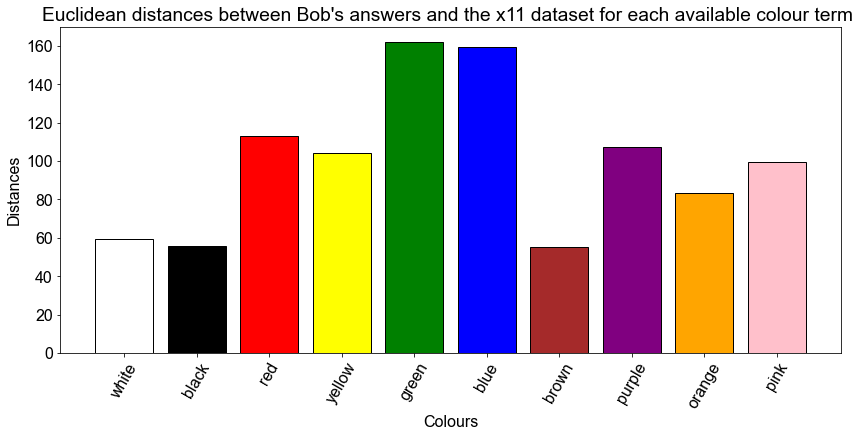

In [9]:
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 16})
plt.bar(cnd_redacted, distances, color=cnd_redacted, edgecolor='black')
plt.title("Euclidean distances between Bob's answers and the x11 dataset for each available colour term ")
plt.ylabel("Distances")
fig = plt.gcf()
fig.set_size_inches(14, 6)
ax = plt.gca()
ax.set_xlabel("Colours")
plt.xticks(rotation=60)

Below, the top half of each square is a shade generated by the RGB values from the x11 dictionary while the bottom half is a shade generated by the RGB values from Bob's dictionary. We can therefore, visualise the distances between the two by comparing the contrast of the two shades.

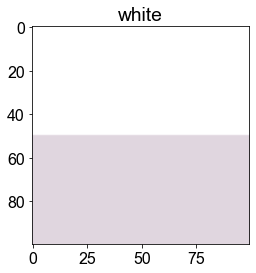

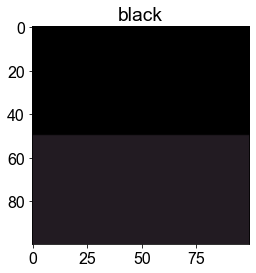

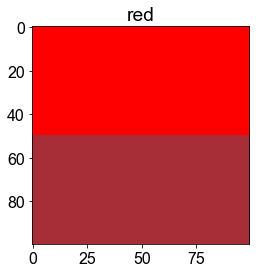

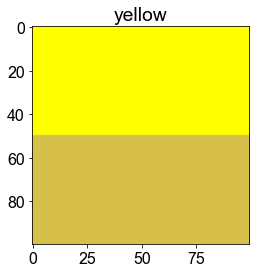

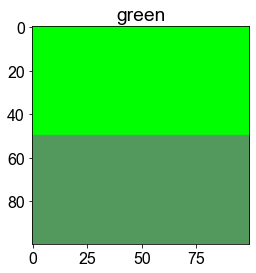

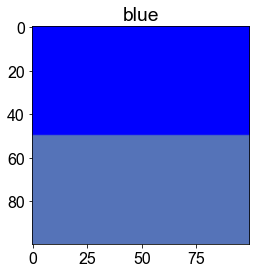

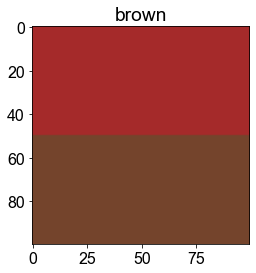

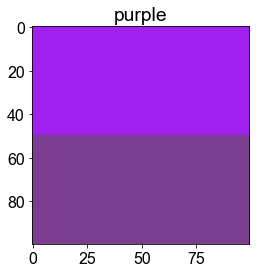

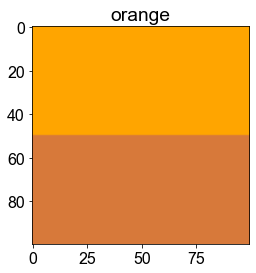

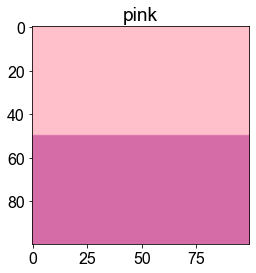

In [10]:
colours = np.zeros([100, 100, 3], dtype=np.uint8)
for i in cnd_redacted:
    colours[50:,:] = [cnd_dic[i][0], cnd_dic[i][1], cnd_dic[i][-1]] 
    colours[: 50,:] = [x11_dic[i][0], x11_dic[i][1] , x11_dic[i][-1]] 
    img = Image.fromarray(colours)
    imgplot = plt.imshow(img)
    plt.title(i)
    plt.show()

Below, automated testing is used to check our results.

In [14]:
avg = statistics.mean(distances)
std = statistics.stdev(distances)
assert avg < 92 + 0.25*std and avg > 92 - 0.25*std

In [12]:
print((avg - 92)/std)

0.20597685660312026


# Conclusion and Results
* All of the default terms with the exception of 'ipsum' and 'lorem' were present in both data sets.
* My results indicate that on the whole Bob's answers were fairly accurate yet none of his answers converged exaclty. From the graph, we can clearly see that'black' and 'brown' were the most accurate while 'green' and 'blue' were the least accurate.
* My results were calucated in a quick period of time.
* My results were comfortably within an accurate range since they deviated from 92 by 0.206 (3sf) standard deviations of the 'distances' dataset.

# Ethical Reflections
The majority of this project consisted of reformating data as well as making calculations with said data. These areas were not of any ethical significance. There was, however, one area of ethical significance which was making sure the averages which constituted Bob's answers were truly repersentative of all of the user inputs. To ensure this was the case proper preprocessing was crucial. Related to this point was the question of whether to only include exact terms or whether any semantically similar alternate terms might be included. This is a subjective consideration making transparency key. In the end for the sake of simplicty, I decided to only include exact terms.

# References
* [remove_punctuation function, Arthur Gouveia, 21/01/21](https://stackoverflow.com/questions/39782418/remove-punctuations-in-pandas)
* create RGB images, WK10_Interactive_Lecture, Dimitris Mylonas, 27/01/21
* increase font size of graph, Notebook for data representations, Alexandros Koliousis, 29/01/21

